In [1]:
from utils import *
%load_ext autoreload
%autoreload 2

In [2]:

# --- How to use it ---
model_path='/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt'

checkpoint = torch.load(model_path)
disease_names = checkpoint['disease_names']


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_54203/3330960920.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


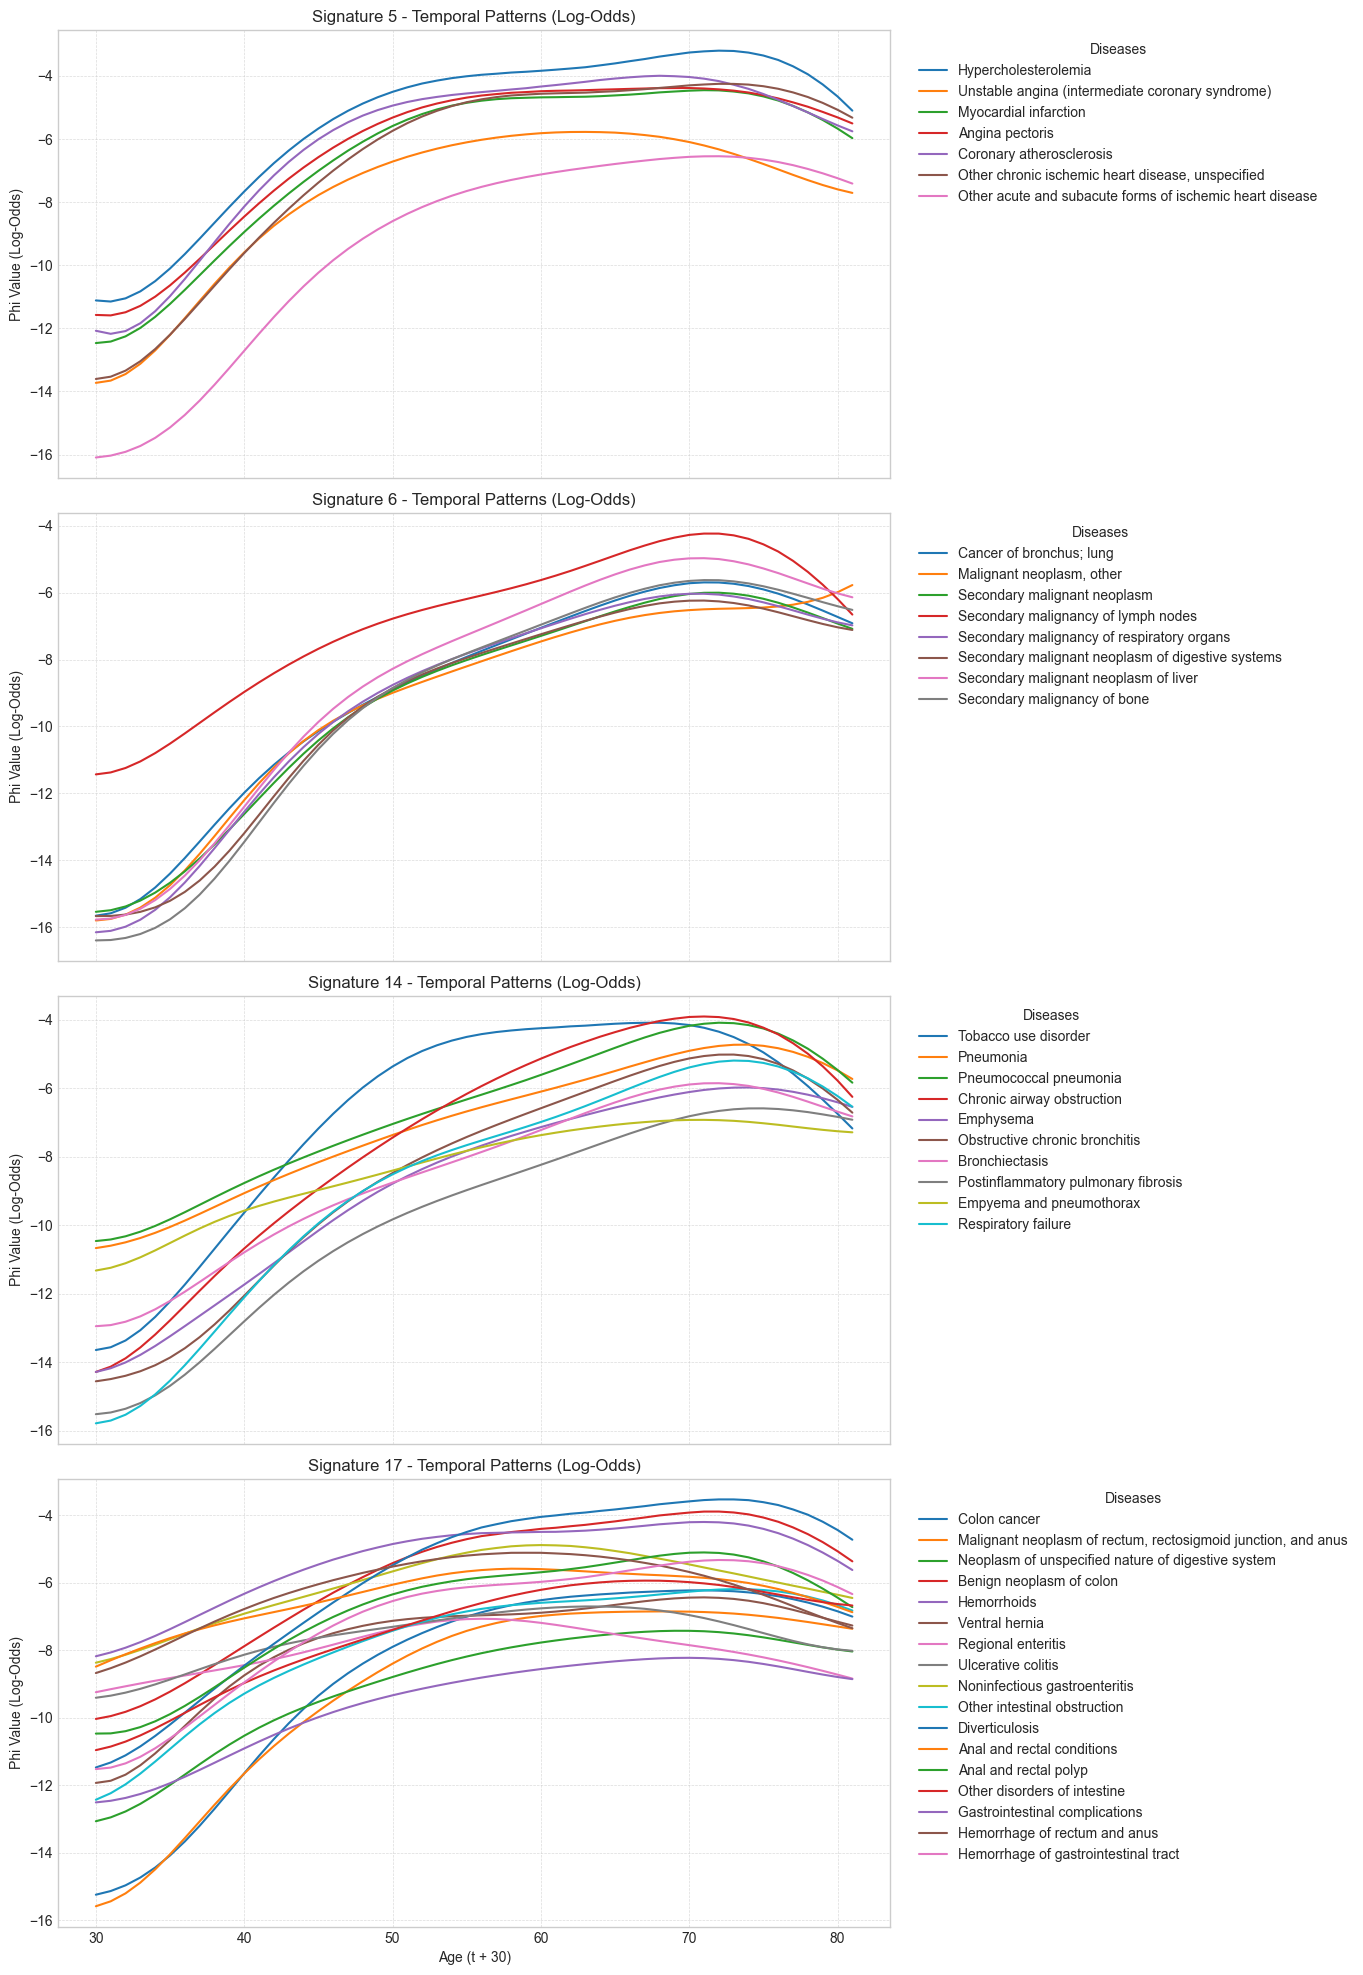

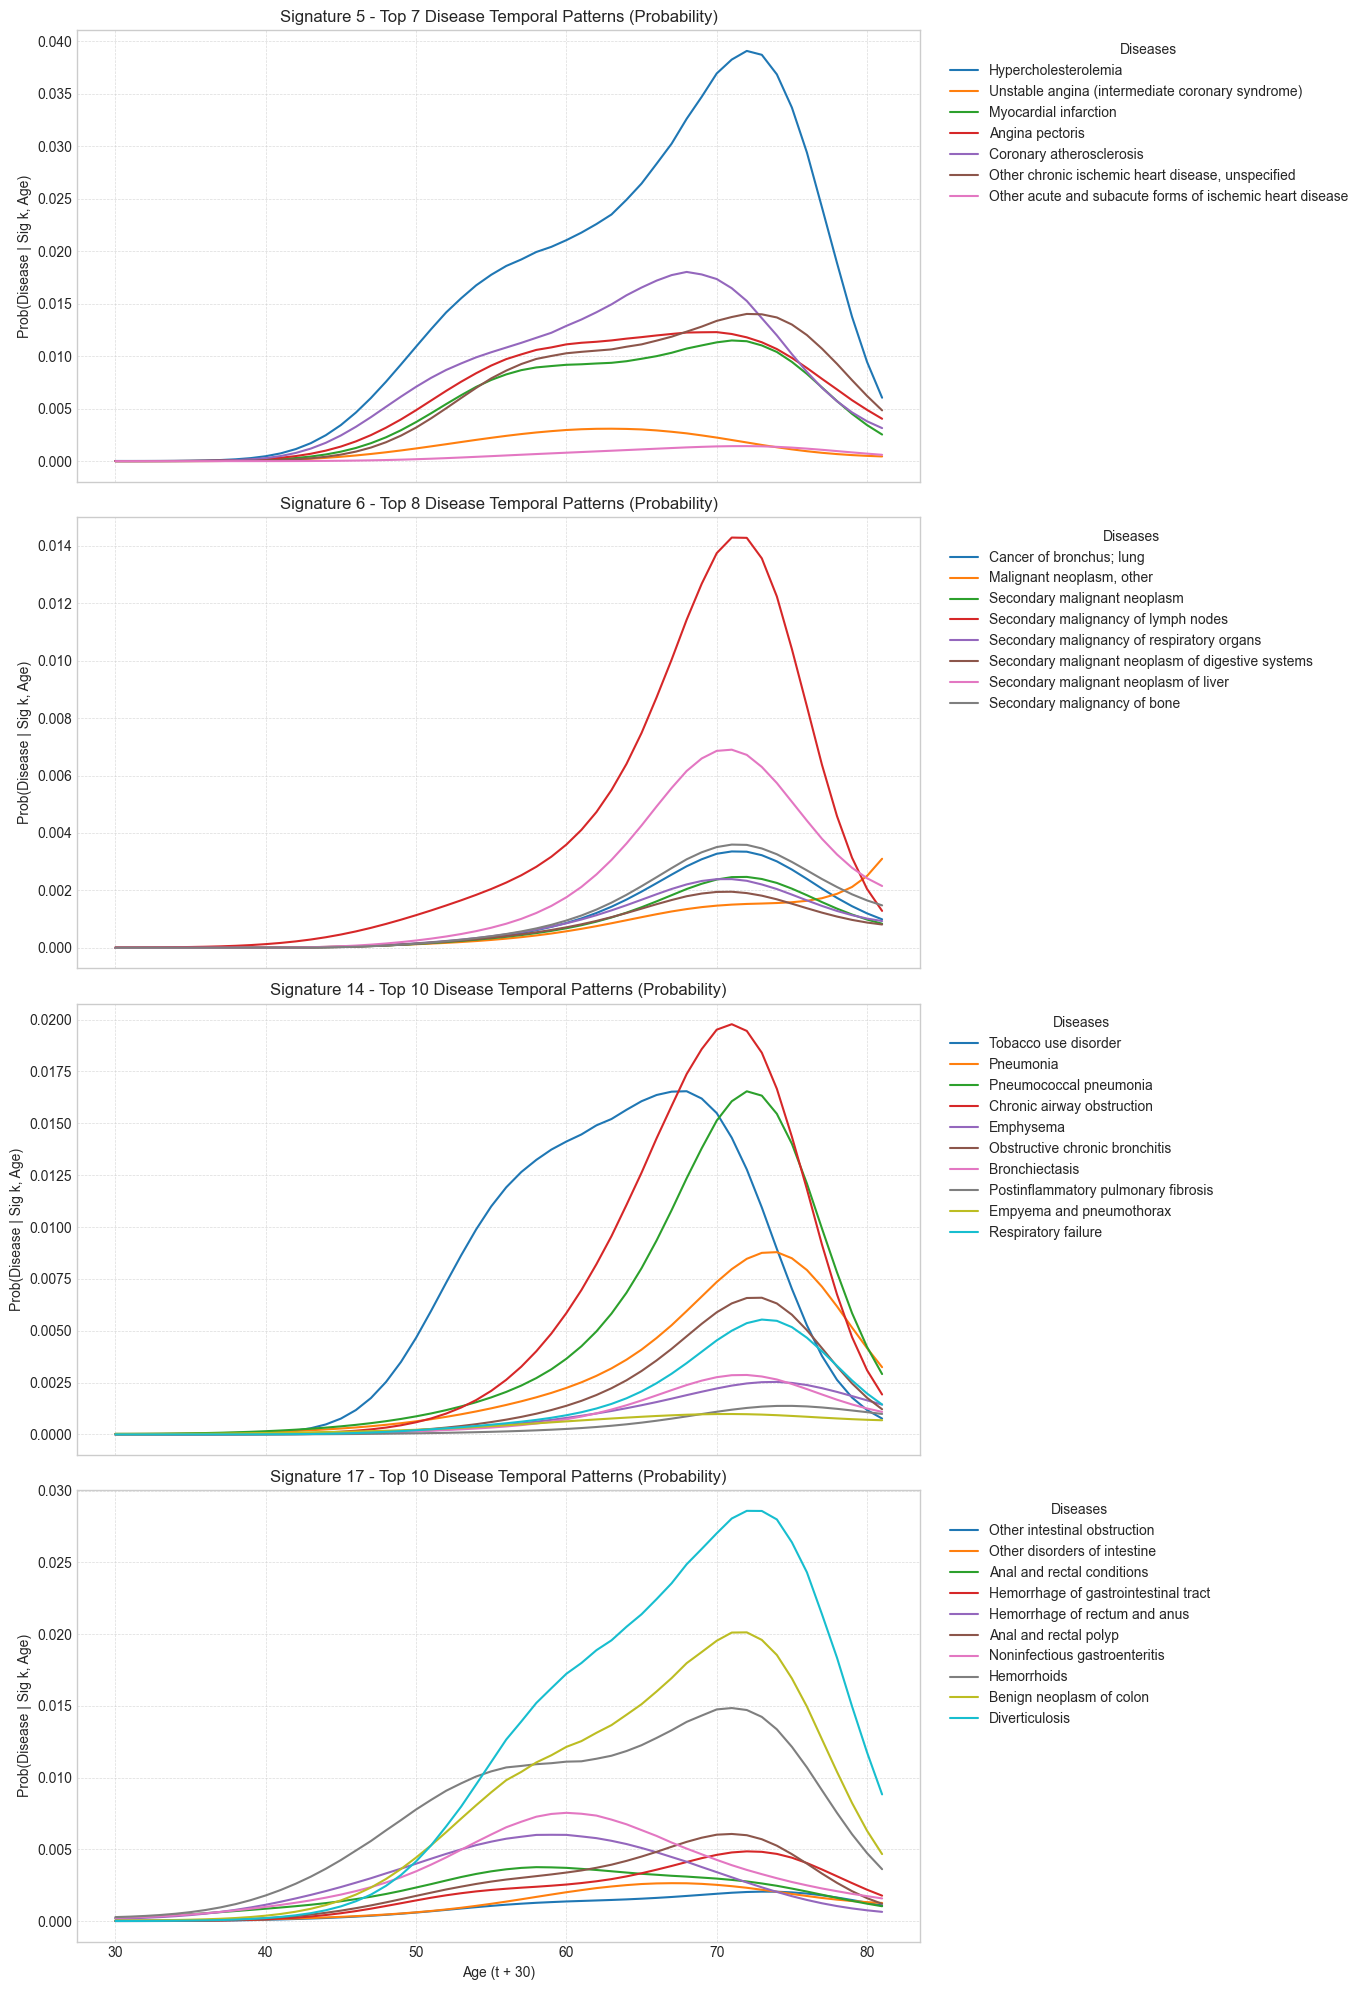

In [4]:

if isinstance(disease_names, pd.DataFrame):
 disease_names = disease_names.iloc[:, 0].tolist()

# 2. Extract the raw phi (log-odds)
phi_log_odds = checkpoint['model_state_dict']['phi'] # Or wherever it's stored

# 3. Determine the primary signature assignment for each disease
#    This likely comes from the 'psi' matrix (disease x cluster probabilities)
psi = checkpoint['model_state_dict']['psi']
if psi.requires_grad:
 psi = psi.detach()
# # Assuming psi rows are clusters, columns are diseases after transpose
#disease_to_signature_map = torch.argmax(psi, dim=0).cpu().numpy()
disease_to_signature_map = {i: int(cluster) for i, cluster in enumerate(checkpoint['clusters'])}
disease_to_signature_map = {i: int(sig) for i, sig in enumerate(torch.argmax(psi, dim=0).cpu().numpy())}

selected_signatures_to_plot = [5, 6, 14,17] # Example signatures

plot_signature_temporal_patterns_assigned(
phi_log_odds=phi_log_odds,
disease_names=disease_names,
disease_to_signature_map=disease_to_signature_map,
selected_signatures=selected_signatures_to_plot,
num_time_points=phi_log_odds.shape[-1], # Get time points from phi shape
age_offset=30,
#top_n_diseases=10, # Optional: limit to top 10
plot_probability=False, # Set to False to plot raw log-odds
output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/signature_temporal_patterns_age_logodds.pdf'
)

plot_signature_temporal_patterns_assigned(
    phi_log_odds=phi_log_odds,
    disease_names=disease_names,
    disease_to_signature_map=disease_to_signature_map,
    selected_signatures=selected_signatures_to_plot,
    num_time_points=phi_log_odds.shape[-1],
    age_offset=30,
    top_n_diseases=10,
    plot_probability=True, # Set to True to plot probability
    output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/signature_temporal_patterns_age_prob.pdf'
)

In [5]:

from utils import *
psi = checkpoint['model_state_dict']['psi']
disease_names = checkpoint['disease_names']
plot_signature_psi_heatmap(psi, disease_names, n_top_diseases=5, output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/signature_psi_heatmap.pdf')

Plot saved to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/signature_psi_heatmap.pdf


In [6]:
psi.shape


torch.Size([21, 348])

In [76]:

plot_signature_psi_heatmap(
  psi,
  disease_names,
 y_label_style= 'signature_number',
output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/psi_heatmap.pdf'
)

Plot saved to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/psi_heatmap.pdf


In [86]:
# If disease_names is a DataFrame
if isinstance(checkpoint['disease_names'], pd.DataFrame):
    print("Disease names as DataFrame:")
    print(checkpoint['disease_names'].iloc[:,0].tolist())
# If it's a list or array
else:
    print("Disease names as list:")
    for i, name in enumerate(checkpoint['disease_names']):
        print(f"{i}: {name}")

Disease names as DataFrame:
[np.str_('Bacterial enteritis'), np.str_('Viral Enteritis'), np.str_('Gram negative septicemia'), np.str_('Bacterial infection NOS'), np.str_('Staphylococcus infections'), np.str_('Streptococcus infection'), np.str_('E. coli'), np.str_('Viral warts & HPV'), np.str_('Viral infection'), np.str_('Candidiasis'), np.str_('Colon cancer'), np.str_('Malignant neoplasm of rectum, rectosigmoid junction, and anus'), np.str_('Neoplasm of unspecified nature of digestive system'), np.str_('Cancer of bronchus; lung'), np.str_('Melanomas of skin'), np.str_('Other non-epithelial cancer of skin'), np.str_('Breast cancer [female]'), np.str_('Malignant neoplasm of female breast'), np.str_('Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia]'), np.str_('Malignant neoplasm of uterus'), np.str_('Malignant neoplasm of ovary'), np.str_('Cancer of prostate'), np.str_('Malignant neoplasm of kidney, except pelvis'), np.str_('Malignant neoplasm of bladder'), np.str_('Malignant

In [20]:
# Your specific list of diseases
target_diseases = [
    "Colon cancer",
    "Cancer of bronchus; lung",
    "Malignant neoplasm of female breast",
    "Cancer of prostate",
    "Hypothyroidism NOS",
    "Type 2 diabetes",
    "Major depressive disorder",
    "Anxiety disorder",
    "Alcoholic liver damage",
    "Parkinson's disease",
    "Multiple sclerosis",
    "Macular degeneration (senile) of retina NOS",
    "Aortic valve disease",
    "Myocardial infarction",
    "Atrial fibrillation and flutter",
    "Esophageal bleeding",
    "Occlusion of cerebral arteries",
    "GERD",
    "Pneumonia",
    "Asthma",
    "Emphysema",
    "Barrett's esophagus",
    "Cholelithiasis",
    "Chronic Kidney Disease, Stage III",
    "Rheumatoid arthritis",
    "Osteoarthritis; localized",
    "Osteoporosis NOS",
    "Sepsis"
]

# Convert disease_names from checkpoint to list if needed
if isinstance(checkpoint['disease_names'], pd.DataFrame):
    disease_names_list = checkpoint['disease_names'].iloc[:, 0].tolist()
else:
    disease_names_list = checkpoint['disease_names']

# Find indices (case-insensitive)
selected_indices = []
selected_names = []  # Store exact names from the list
not_found = []

print("Searching for disease indices...")
for target in target_diseases:
    found = False
    target_lower = target.lower()
    
    # Try exact match first
    for idx, name in enumerate(disease_names_list):
        if name.lower() == target_lower:
            selected_indices.append(idx)
            selected_names.append(name)
            print(f"Found exact match for '{target}' at index {idx}")
            found = True
            break
    
    if not found:
        # Try partial match if exact match fails
        for idx, name in enumerate(disease_names_list):
            if target_lower in name.lower():
                selected_indices.append(idx)
                selected_names.append(name)
                print(f"Found partial match for '{target}' at index {idx}: '{name}'")
                found = True
                break
    
    if not found:
        not_found.append(target)
        print(f"Could not find match for: '{target}'")

print("\nSummary:")
print(f"Found {len(selected_indices)} matches")
print("\nSelected indices:", selected_indices)
print("\nSelected names:")
for idx, name in zip(selected_indices, selected_names):
    print(f"{idx}: {name}")

if not_found:
    print("\nCould not find matches for:")
    for disease in not_found:
        print(f"- {disease}")

Searching for disease indices...
Found exact match for 'Colon cancer' at index 10
Found exact match for 'Cancer of bronchus; lung' at index 13
Found exact match for 'Malignant neoplasm of female breast' at index 17
Found exact match for 'Cancer of prostate' at index 21
Found exact match for 'Hypothyroidism NOS' at index 45
Found exact match for 'Type 2 diabetes' at index 47
Found exact match for 'Major depressive disorder' at index 66
Found exact match for 'Anxiety disorder' at index 67
Found exact match for 'Alcoholic liver damage' at index 69
Found exact match for 'Parkinson's disease' at index 73
Found exact match for 'Multiple sclerosis' at index 75
Found exact match for 'Macular degeneration (senile) of retina NOS' at index 85
Found exact match for 'Aortic valve disease' at index 107
Found exact match for 'Myocardial infarction' at index 112
Found exact match for 'Atrial fibrillation and flutter' at index 127
Found partial match for 'Esophageal bleeding' at index 184: 'Esophageal 

In [3]:

# Using the function with your checkpoint data:
# Assuming checkpoint contains 'model_state_dict' with 'lambda' and 'phi'
lambda_params = checkpoint['model_state_dict']['lambda_']
phi = checkpoint['model_state_dict']['phi']
kappa = checkpoint['model_state_dict']['kappa']

# Calculate pi_pred
pi_pred = calculate_pi_pred(lambda_params, phi, kappa)


In [10]:
pi_pred_np = pi_pred.detach().cpu().numpy()
pi_pred_avg = np.mean(pi_pred_np, axis=0)

print(np.min(pi_pred_avg), np.max(pi_pred_avg))

9.038354e-09 0.023685304


In [ ]:

from utils import *
# Now we can use pi_pred in our plotting function:
plot_disease_probabilities_heatmap(
    pi_pred=pi_pred,
    selected_disease_indices=selected_indices,
    selected_disease_names=selected_names,
    age_offset=30,
    figsize=(12, 15),
    cmap="Blues",
    output_path='disease_probability_heatmap.pdf'
)

In [ ]:


# --- Example Usage (Identical) ---
pi_pred_tensor = pi_pred
# Log scale (default)
plot_all_disease_probabilities_heatmap(
    pi_pred=pi_pred_tensor,
    psi=psi,
    disease_names=disease_names_list,
    selected_indices=selected_indices,
    age_offset=30,
    figsize=(18, 20), # Adjusted size
    scale_type='log',
    cmap = "Reds", 
    output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/red_scale_disease_probabilities_log_pointers.pdf'
)

# Linear scale
plot_all_disease_probabilities_heatmap(
    pi_pred=pi_pred_tensor,
    psi=psi,
    disease_names=disease_names_list,
    selected_indices=selected_indices,
    age_offset=30,
    figsize=(18, 20), # Adjusted size
    scale_type='linear',
    cmap = "Reds", 
    robust_scaling=True,
    output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/red_scale_disease_probabilities_linear_pointers.pdf'
)


Plot saved to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/red_scale_disease_probabilities_log_pointers.pdf
Plot saved to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure2/red_scale_disease_probabilities_linear_pointers.pdf


In [40]:

mgb_checkpoint = torch.load('/Users/sarahurbut/Dropbox/model_with_kappa_bigam_MGB.pt')
aou_checkpoint = torch.load('/Users/sarahurbut/Dropbox/model_with_kappa_bigam_aou.pt')
ukb_checkpoint = torch.load("/Users/sarahurbut/Dropbox/model_with_kappa_bigam.pt")

# Create plots
results = plot_disease_blocks(
    mgb_checkpoint=mgb_checkpoint,
    aou_checkpoint=aou_checkpoint,
    ukb_checkpoint=ukb_checkpoint,
    output_path='biobank_cluster_correspondence.pdf'
)

# Access results if needed
mgb_correspondence = results['cross_tab_mgb']
aou_correspondence = results['cross_tab_aou']
mgb_matches = results['best_matches_mgb']
aou_matches = results['best_matches_aou']

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_65277/3097579898.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mgb_checkpoint = torch.load('/Users/sarahur

Plot saved to biobank_cluster_correspondence.pdf


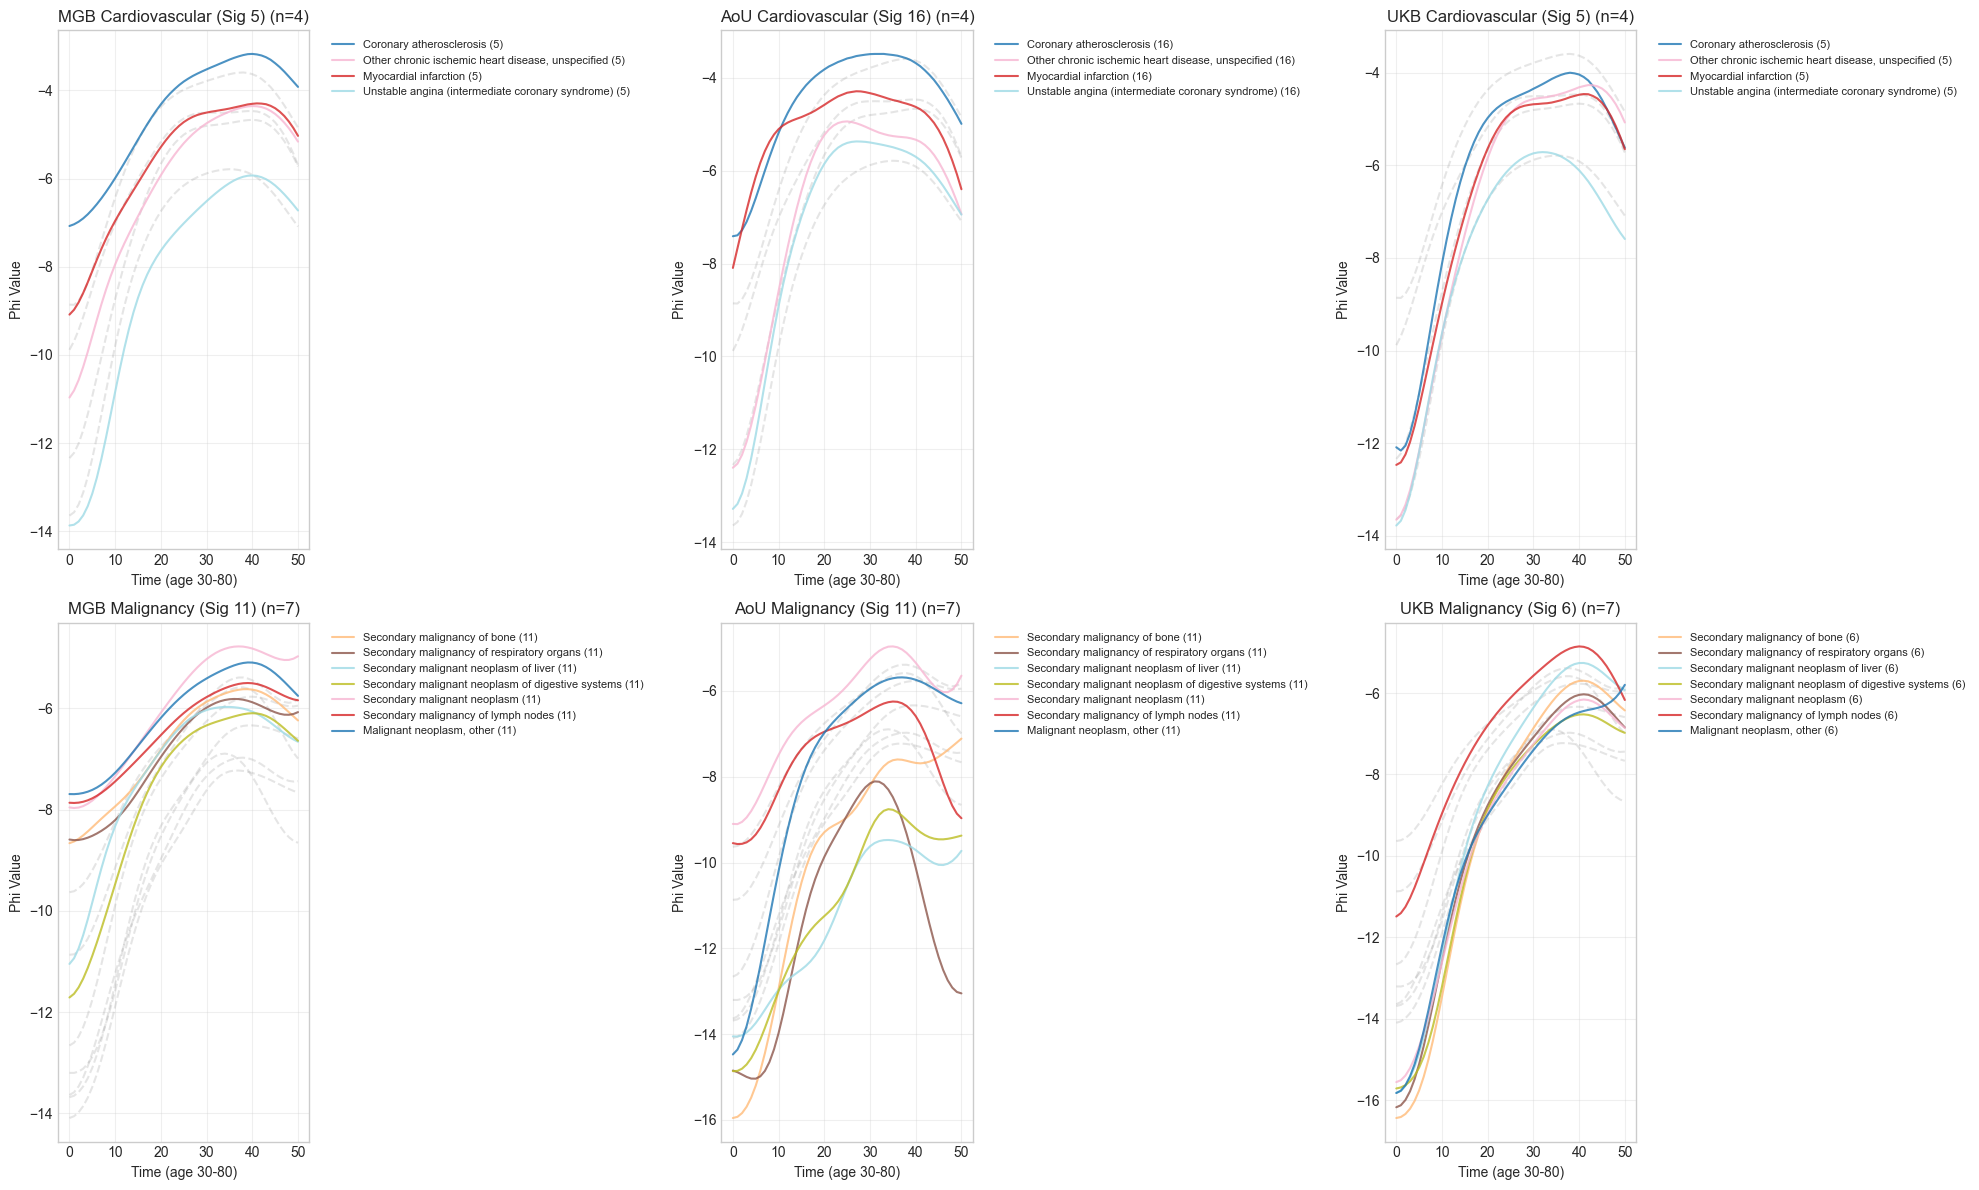


Summary of shared diseases across biobanks:

Cardiovascular signature (shared across MGB:5, AoU:16, UKB:5):
Number of shared diseases: 4
Diseases:
- Coronary atherosclerosis
- Myocardial infarction
- Other chronic ischemic heart disease, unspecified
- Unstable angina (intermediate coronary syndrome)

Malignancy signature (shared across MGB:11, AoU:11, UKB:6):
Number of shared diseases: 7
Diseases:
- Malignant neoplasm, other
- Secondary malignancy of bone
- Secondary malignancy of lymph nodes
- Secondary malignancy of respiratory organs
- Secondary malignant neoplasm
- Secondary malignant neoplasm of digestive systems
- Secondary malignant neoplasm of liver


In [44]:
def plot_signature_patterns_by_clusters(mgb_checkpoint, aou_checkpoint, ukb_checkpoint, 
                                      mgb_diseases, aou_diseases, ukb_diseases):
    """
    Plot temporal patterns for diseases that are shared across all biobanks in each signature group,
    using consistent colors for the same diseases and showing global averages
    """
    # Define signature mappings for each biobank
    cv_signatures = {
        'mgb': 5,
        'aou': 16,
        'ukb': 5
    }
    
    malig_signatures = {
        'mgb': 11,
        'aou': 11,
        'ukb': 6
    }
    
    # Get clusters from checkpoints
    mgb_clusters = mgb_checkpoint['clusters']
    aou_clusters = aou_checkpoint['clusters']
    ukb_clusters = ukb_checkpoint['clusters']
    
    # Find all diseases in each signature for each biobank
    def get_signature_diseases(diseases, clusters, sig_num):
        return {name: i for i, name in enumerate(diseases) 
                if clusters[i] == sig_num}
    
    # Get cardiovascular diseases for each biobank
    mgb_cv = get_signature_diseases(mgb_diseases, mgb_clusters, 5)
    aou_cv = get_signature_diseases(aou_diseases, aou_clusters, 16)
    ukb_cv = get_signature_diseases(ukb_diseases, ukb_clusters, 5)
    
    # Get malignancy diseases for each biobank
    mgb_malig = get_signature_diseases(mgb_diseases, mgb_clusters, 11)
    aou_malig = get_signature_diseases(aou_diseases, aou_clusters, 11)
    ukb_malig = get_signature_diseases(ukb_diseases, ukb_clusters, 6)
    
    # Find shared diseases across biobanks
    cv_shared = set(mgb_cv.keys()) & set(aou_cv.keys()) & set(ukb_cv.keys())
    malig_shared = set(mgb_malig.keys()) & set(aou_malig.keys()) & set(ukb_malig.keys())
    
    # Create figure with 2 rows and 3 columns
    fig, ((ax1_mgb, ax1_aou, ax1_ukb), 
          (ax2_mgb, ax2_aou, ax2_ukb)) = plt.subplots(2, 3, figsize=(20, 12))
    
    # Create consistent color mappings for shared diseases
    cv_colors = dict(zip(sorted(cv_shared), plt.cm.tab20(np.linspace(0, 1, len(cv_shared)))))
    malig_colors = dict(zip(sorted(malig_shared), plt.cm.tab20(np.linspace(0, 1, len(malig_shared)))))
    
    # Helper function to plot patterns for one biobank
    def plot_biobank_patterns(diseases_dict, shared_diseases, signature_num, checkpoint, 
                            ax, title, colors, other_checkpoints=None, other_sigs=None):
        # First plot average patterns in background
        if other_checkpoints and other_sigs:
            for disease in shared_diseases:
                patterns = []
                for cp, sig in zip(other_checkpoints, other_sigs):
                    idx = diseases_dict[disease]
                    pattern = cp['model_state_dict']['phi'][sig, idx, :51]
                    patterns.append(pattern)
                avg_pattern = np.mean(patterns, axis=0)
                ax.plot(avg_pattern, color='gray', alpha=0.2, linestyle='--')
        
        # Then plot this biobank's patterns
        for disease in shared_diseases:
            idx = diseases_dict[disease]
            pattern = checkpoint['model_state_dict']['phi'][signature_num, idx, :51]
            ax.plot(pattern, color=colors[disease], alpha=0.8,
                   label=f"{disease} ({signature_num})")
        
        ax.set_xlabel('Time (age 30-80)')
        ax.set_ylabel('Phi Value')
        ax.set_title(f"{title} (n={len(shared_diseases)})")
        ax.grid(True, alpha=0.3)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    # Plot cardiovascular patterns for each biobank
    other_checkpoints = [mgb_checkpoint, aou_checkpoint, ukb_checkpoint]
    other_cv_sigs = [cv_signatures['mgb'], cv_signatures['aou'], cv_signatures['ukb']]
    
    plot_biobank_patterns(mgb_cv, cv_shared, cv_signatures['mgb'], mgb_checkpoint,
                         ax1_mgb, 'MGB Cardiovascular (Sig 5)', cv_colors,
                         other_checkpoints, other_cv_sigs)
    plot_biobank_patterns(aou_cv, cv_shared, cv_signatures['aou'], aou_checkpoint,
                         ax1_aou, 'AoU Cardiovascular (Sig 16)', cv_colors,
                         other_checkpoints, other_cv_sigs)
    plot_biobank_patterns(ukb_cv, cv_shared, cv_signatures['ukb'], ukb_checkpoint,
                         ax1_ukb, 'UKB Cardiovascular (Sig 5)', cv_colors,
                         other_checkpoints, other_cv_sigs)
    
    # Plot malignancy patterns for each biobank
    other_malig_sigs = [malig_signatures['mgb'], malig_signatures['aou'], malig_signatures['ukb']]
    
    plot_biobank_patterns(mgb_malig, malig_shared, malig_signatures['mgb'], mgb_checkpoint,
                         ax2_mgb, 'MGB Malignancy (Sig 11)', malig_colors,
                         other_checkpoints, other_malig_sigs)
    plot_biobank_patterns(aou_malig, malig_shared, malig_signatures['aou'], aou_checkpoint,
                         ax2_aou, 'AoU Malignancy (Sig 11)', malig_colors,
                         other_checkpoints, other_malig_sigs)
    plot_biobank_patterns(ukb_malig, malig_shared, malig_signatures['ukb'], ukb_checkpoint,
                         ax2_ukb, 'UKB Malignancy (Sig 6)', malig_colors,
                         other_checkpoints, other_malig_sigs)
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSummary of shared diseases across biobanks:")
    print(f"\nCardiovascular signature (shared across MGB:5, AoU:16, UKB:5):")
    print(f"Number of shared diseases: {len(cv_shared)}")
    print("Diseases:")
    for disease in sorted(cv_shared):
        print(f"- {disease}")
    
    print(f"\nMalignancy signature (shared across MGB:11, AoU:11, UKB:6):")
    print(f"Number of shared diseases: {len(malig_shared)}")
    print("Diseases:")
    for disease in sorted(malig_shared):
        print(f"- {disease}")

# Example usage:
plot_signature_patterns_by_clusters(mgb_checkpoint, aou_checkpoint, ukb_checkpoint,
                                  mgb_checkpoint['disease_names'], aou_checkpoint['disease_names'], ukb_checkpoint['disease_names'])

In [49]:


# --- Example Usage ---
mgb_checkpoint = torch.load('/Users/sarahurbut/Dropbox/model_with_kappa_bigam_MGB.pt', map_location=torch.device('cpu'))
aou_checkpoint = torch.load('/Users/sarahurbut/Dropbox/model_with_kappa_bigam_aou.pt', map_location=torch.device('cpu'))
ukb_checkpoint = torch.load("/Users/sarahurbut/Dropbox/model_with_kappa_bigam.pt", map_location=torch.device('cpu'))

plot_signature_patterns_by_clusters( # Call the original function name
    mgb_checkpoint,
    aou_checkpoint,
    ukb_checkpoint,
    mgb_checkpoint['disease_names'],
    aou_checkpoint['disease_names'],
    ukb_checkpoint['disease_names'],
    output_path='signature_patterns_comparison_lines.pdf' # Specify the output file name
)

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_65277/3035061700.py:240: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mgb_checkpoint = torch.load('/Users/sarahur

Using minimum time points across biobanks: 51
Plot saved to signature_patterns_comparison_lines.pdf

Summary of shared diseases across biobanks:

Cardiovascular signature (shared across MGB:5, AoU:16, UKB:5):
Number of shared diseases: 4
Diseases:
- Coronary atherosclerosis
- Myocardial infarction
- Other chronic ischemic heart disease, unspecified
- Unstable angina (intermediate coronary syndrome)

Malignancy signature (shared across MGB:11, AoU:11, UKB:6):
Number of shared diseases: 7
Diseases:
- Malignant neoplasm, other
- Secondary malignancy of bone
- Secondary malignancy of lymph nodes
- Secondary malignancy of respiratory organs
- Secondary malignant neoplasm
- Secondary malignant neoplasm of digestive systems
- Secondary malignant neoplasm of liver


In [50]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, List, Optional, Set

def plot_signature_patterns_by_clusters(
    mgb_checkpoint: Dict,
    aou_checkpoint: Dict,
    ukb_checkpoint: Dict,
    mgb_diseases: List[str],
    aou_diseases: List[str],
    ukb_diseases: List[str],
    output_path: Optional[str] = None,
    figsize: tuple = (20, 12)
):
    """
    Plot temporal patterns for diseases that are shared across all biobanks in each signature group,
    using consistent colors for the same diseases and showing global averages.
    Saves the plot to a PDF file if output_path is provided.
    Handles potentially different time dimensions in phi tensors.

    Args:
        mgb_checkpoint: MGB model checkpoint dictionary.
        aou_checkpoint: AoU model checkpoint dictionary.
        ukb_checkpoint: UKB model checkpoint dictionary.
        mgb_diseases: List of disease names for MGB.
        aou_diseases: List of disease names for AoU.
        ukb_diseases: List of disease names for UKB.
        output_path: Optional path to save the plot as PDF. If None, shows the plot.
        figsize: Figure size tuple.
    """
    # Define signature mappings (consider making these arguments?)
    cv_signatures = {'mgb': 5, 'aou': 16, 'ukb': 5}
    malig_signatures = {'mgb': 11, 'aou': 11, 'ukb': 6}

    # Get clusters from checkpoints
    mgb_clusters = mgb_checkpoint['clusters']
    aou_clusters = aou_checkpoint['clusters']
    ukb_clusters = ukb_checkpoint['clusters']

    # --- Determine Minimum Time Points ---
    def get_phi_time_dim(checkpoint: Dict) -> int:
        """Safely gets the time dimension size from phi."""
        phi = checkpoint.get('model_state_dict', {}).get('phi', checkpoint.get('phi'))
        if phi is None: return 0
        # Handle tensor or numpy array
        if hasattr(phi, 'shape'):
             # Check if phi has 3 dimensions (K, D, T)
             if len(phi.shape) == 3:
                 return phi.shape[2]
             else:
                 print(f"Warning: 'phi' in checkpoint has unexpected shape {phi.shape}. Expected 3 dimensions.")
                 return 0
        return 0

    time_dims = [
        get_phi_time_dim(mgb_checkpoint),
        get_phi_time_dim(aou_checkpoint),
        get_phi_time_dim(ukb_checkpoint)
    ]
    valid_time_dims = [td for td in time_dims if td > 0]
    if not valid_time_dims:
        raise ValueError("Could not determine valid time dimension from any 'phi' tensor.")
    min_time_points = min(valid_time_dims)
    print(f"Using minimum time points across biobanks: {min_time_points}")
    # --- End Determine Minimum Time Points ---


    # Find all diseases in each signature for each biobank
    def get_signature_diseases(diseases: List[str], clusters: np.ndarray, sig_num: int) -> Dict[str, int]:
        """Returns a dict {disease_name: original_index} for diseases in the given cluster."""
        if isinstance(clusters, torch.Tensor): clusters_np = clusters.cpu().numpy()
        else: clusters_np = np.array(clusters)
        if len(diseases) != len(clusters_np): raise ValueError(f"Length mismatch: {len(diseases)} vs {len(clusters_np)}.")
        indices_in_sig = np.where(clusters_np == sig_num)[0]
        return {diseases[i]: i for i in indices_in_sig}

    # Get diseases for specified signatures
    mgb_cv = get_signature_diseases(mgb_diseases, mgb_clusters, cv_signatures['mgb'])
    aou_cv = get_signature_diseases(aou_diseases, aou_clusters, cv_signatures['aou'])
    ukb_cv = get_signature_diseases(ukb_diseases, ukb_clusters, cv_signatures['ukb'])
    mgb_malig = get_signature_diseases(mgb_diseases, mgb_clusters, malig_signatures['mgb'])
    aou_malig = get_signature_diseases(aou_diseases, aou_clusters, malig_signatures['aou'])
    ukb_malig = get_signature_diseases(ukb_diseases, ukb_clusters, malig_signatures['ukb'])

    # Find shared diseases across biobanks
    cv_shared: Set[str] = set(mgb_cv.keys()) & set(aou_cv.keys()) & set(ukb_cv.keys())
    malig_shared: Set[str] = set(mgb_malig.keys()) & set(aou_malig.keys()) & set(ukb_malig.keys())

    # Create figure and axes
    fig, axes = plt.subplots(2, 3, figsize=figsize, sharey='row')
    ax1_mgb, ax1_aou, ax1_ukb = axes[0]
    ax2_mgb, ax2_aou, ax2_ukb = axes[1]

    # Create color mappings
    cmap_cv = plt.cm.viridis if len(cv_shared) > 20 else plt.cm.tab20
    cmap_malig = plt.cm.viridis if len(malig_shared) > 20 else plt.cm.tab20
    cv_colors = dict(zip(sorted(cv_shared), cmap_cv(np.linspace(0, 1, len(cv_shared))))) if cv_shared else {}
    malig_colors = dict(zip(sorted(malig_shared), cmap_malig(np.linspace(0, 1, len(malig_shared))))) if malig_shared else {}

    # Helper function to plot patterns for one biobank
    def plot_biobank_patterns(
        biobank_diseases_dict: Dict[str, int],
        shared_diseases_set: Set[str],
        target_signature_num: int,
        target_checkpoint: Dict,
        ax: plt.Axes,
        title: str,
        colors: Dict[str, tuple],
        num_time_points_to_plot: int, # Pass the determined minimum time points
        all_checkpoints: Optional[List[Dict]] = None,
        all_corresponding_sigs: Optional[List[int]] = None
    ):
        """Plots patterns using a consistent number of time points."""
        phi_key = 'phi'
        phi = target_checkpoint.get('model_state_dict', {}).get(phi_key, target_checkpoint.get(phi_key))
        if phi is None:
            print(f"Warning: Cannot find '{phi_key}' for {title}. Skipping.")
            ax.set_title(f"{title}\n(Error: Phi not found)")
            return

        if isinstance(phi, torch.Tensor): phi_np = phi.detach().cpu().numpy()
        else: phi_np = np.array(phi)

        # Check if phi has enough time points
        if phi_np.shape[2] < num_time_points_to_plot:
             print(f"Warning: Phi for {title} has only {phi_np.shape[2]} time points, less than required {num_time_points_to_plot}. Skipping.")
             ax.set_title(f"{title}\n(Error: Insufficient time points)")
             return

        x_axis = np.arange(num_time_points_to_plot) # X-axis based on consistent length

        # Plot average patterns using num_time_points_to_plot
        if all_checkpoints and all_corresponding_sigs and len(all_checkpoints) == len(all_corresponding_sigs):
            avg_patterns_dict = {}
            for disease in shared_diseases_set:
                patterns = []
                for i, cp in enumerate(all_checkpoints):
                    sig = all_corresponding_sigs[i]
                    current_diseases = cp.get('disease_names', [])
                    current_clusters = cp.get('clusters', [])
                    if not isinstance(current_diseases, list): current_diseases = list(current_diseases)

                    try:
                        original_idx = current_diseases.index(disease)
                        current_clusters_np = np.array(current_clusters)

                        # Check cluster assignment robustness (optional but good)
                        if original_idx < len(current_clusters_np) and current_clusters_np[original_idx] == sig:
                            current_phi = cp.get('model_state_dict', {}).get('phi', cp.get('phi'))
                            if current_phi is not None:
                                if isinstance(current_phi, torch.Tensor): current_phi_np = current_phi.detach().cpu().numpy()
                                else: current_phi_np = np.array(current_phi)

                                # Check shapes and slice using num_time_points_to_plot
                                if (len(current_phi_np.shape) == 3 and
                                    sig < current_phi_np.shape[0] and
                                    original_idx < current_phi_np.shape[1] and
                                    current_phi_np.shape[2] >= num_time_points_to_plot): # Ensure enough time points
                                     patterns.append(current_phi_np[sig, original_idx, :num_time_points_to_plot]) # Slice consistently!
                                else:
                                     print(f"Warning: Skipping pattern for avg calc due to shape/index issue: {disease} (sig {sig}, idx {original_idx}) in CP {i}. Shape: {current_phi_np.shape if current_phi is not None else 'N/A'}")
                        # else: disease not in the expected cluster for this CP - skip its contribution to avg
                    except ValueError: print(f"Warning: Shared disease '{disease}' not found in CP {i}'s list.")
                    except IndexError: print(f"Warning: Cluster index OOB for {disease} in CP {i}.")

                if patterns:
                    try:
                        # Stack should now work as all patterns have length num_time_points_to_plot
                        avg_pattern = np.mean(np.stack(patterns), axis=0)
                        avg_patterns_dict[disease] = avg_pattern
                        ax.plot(x_axis, avg_pattern, color='gray', alpha=0.2, linestyle='--')
                    except ValueError as e:
                         # This shouldn't happen now, but catch just in case
                         print(f"Error stacking patterns for {disease} despite consistent slicing: {e}")
                         print(f"Pattern shapes: {[p.shape for p in patterns]}")


        # Plot this specific biobank's patterns using num_time_points_to_plot
        plotted_labels = set()
        for disease in shared_diseases_set:
            if disease in biobank_diseases_dict:
                idx = biobank_diseases_dict[disease]
                if target_signature_num < phi_np.shape[0] and idx < phi_np.shape[1]:
                    pattern = phi_np[target_signature_num, idx, :num_time_points_to_plot] # Slice consistently!
                    label = disease
                    if label not in plotted_labels:
                         ax.plot(x_axis, pattern, color=colors.get(disease, 'black'), alpha=0.8, label=label)
                         plotted_labels.add(label)
                    else:
                         ax.plot(x_axis, pattern, color=colors.get(disease, 'black'), alpha=0.8)
                else: print(f"Warning: Index OOB for {disease} (sig {target_signature_num}, idx {idx}) in {title}.")

        # Customize plot
        ax.set_xlabel(f'Time Steps (0-{num_time_points_to_plot-1})')
        ax.set_ylabel('Phi Value (Log Odds Ratio)')
        ax.set_title(f"{title}\n(n={len(shared_diseases_set)} shared diseases)")
        ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey', alpha=0.3)
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=6))


    # --- Plotting Calls ---
    all_checkpoints_list = [mgb_checkpoint, aou_checkpoint, ukb_checkpoint]

    # Cardiovascular
    other_cv_sigs = [cv_signatures['mgb'], cv_signatures['aou'], cv_signatures['ukb']]
    plot_biobank_patterns(mgb_cv, cv_shared, cv_signatures['mgb'], mgb_checkpoint, ax1_mgb, 'MGB Cardiovascular (Sig 5)', cv_colors, min_time_points, all_checkpoints_list, other_cv_sigs)
    plot_biobank_patterns(aou_cv, cv_shared, cv_signatures['aou'], aou_checkpoint, ax1_aou, 'AoU Cardiovascular (Sig 16)', cv_colors, min_time_points, all_checkpoints_list, other_cv_sigs)
    plot_biobank_patterns(ukb_cv, cv_shared, cv_signatures['ukb'], ukb_checkpoint, ax1_ukb, 'UKB Cardiovascular (Sig 5)', cv_colors, min_time_points, all_checkpoints_list, other_cv_sigs)

    # Malignancy
    other_malig_sigs = [malig_signatures['mgb'], malig_signatures['aou'], malig_signatures['ukb']]
    plot_biobank_patterns(mgb_malig, malig_shared, malig_signatures['mgb'], mgb_checkpoint, ax2_mgb, 'MGB Malignancy (Sig 11)', malig_colors, min_time_points, all_checkpoints_list, other_malig_sigs)
    plot_biobank_patterns(aou_malig, malig_shared, malig_signatures['aou'], aou_checkpoint, ax2_aou, 'AoU Malignancy (Sig 11)', malig_colors, min_time_points, all_checkpoints_list, other_malig_sigs)
    plot_biobank_patterns(ukb_malig, malig_shared, malig_signatures['ukb'], ukb_checkpoint, ax2_ukb, 'UKB Malignancy (Sig 6)', malig_colors, min_time_points, all_checkpoints_list, other_malig_sigs)

    # --- Add Shared Legends ---
    handles1, labels1 = [], []
    for ax in axes[0]:
        h, l = ax.get_legend_handles_labels()
        for handle, label in zip(h, l):
            if label not in labels1: handles1.append(handle); labels1.append(label)

    handles2, labels2 = [], []
    for ax in axes[1]:
        h, l = ax.get_legend_handles_labels()
        for handle, label in zip(h, l):
            if label not in labels2: handles2.append(handle); labels2.append(label)

    if handles1: fig.legend(handles1, labels1, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=min(5, len(labels1)), title="Shared CV Diseases", fontsize=8)
    if handles2: fig.legend(handles2, labels2, loc='lower center', bbox_to_anchor=(0.5, -0.15 if handles1 else -0.05), ncol=min(5, len(labels2)), title="Shared Malignancy Diseases", fontsize=8)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    fig.subplots_adjust(bottom=0.25 if handles1 and handles2 else 0.15) # Adjust bottom based on legends

    # --- Save or Show ---
    if output_path:
        try:
            import os
            output_dir = os.path.dirname(output_path)
            if output_dir and not os.path.exists(output_dir): os.makedirs(output_dir); print(f"Created directory: {output_dir}")
            plt.savefig(output_path, bbox_inches='tight', dpi=300, facecolor='white')
            print(f"Plot saved to {output_path}")
            plt.close(fig)
        except Exception as e:
            print(f"Error saving plot to {output_path}: {e}")
            plt.close(fig)
    else:
        plt.show()

    # --- Print Summary ---
    # (Summary printing code remains the same)
    print("\nSummary of shared diseases across biobanks:")
    print(f"\nCardiovascular signature (shared across MGB:{cv_signatures['mgb']}, AoU:{cv_signatures['aou']}, UKB:{cv_signatures['ukb']}):")
    print(f"Number of shared diseases: {len(cv_shared)}")
    if cv_shared: print("Diseases:"); [print(f"- {d}") for d in sorted(cv_shared)]
    else: print("No shared CV diseases found.")

    print(f"\nMalignancy signature (shared across MGB:{malig_signatures['mgb']}, AoU:{malig_signatures['aou']}, UKB:{malig_signatures['ukb']}):")
    print(f"Number of shared diseases: {len(malig_shared)}")
    if malig_shared: print("Diseases:"); [print(f"- {d}") for d in sorted(malig_shared)]
    else: print("No shared Malignancy diseases found.")


# --- Example Usage (remains the same) ---
mgb_checkpoint = torch.load('/Users/sarahurbut/Dropbox/model_with_kappa_bigam_MGB.pt', map_location=torch.device('cpu'))
aou_checkpoint = torch.load('/Users/sarahurbut/Dropbox/model_with_kappa_bigam_aou.pt', map_location=torch.device('cpu'))
ukb_checkpoint = torch.load("/Users/sarahurbut/Dropbox/model_with_kappa_bigam.pt", map_location=torch.device('cpu'))

plot_signature_patterns_by_clusters(
    mgb_checkpoint,
    aou_checkpoint,
    ukb_checkpoint,
    mgb_checkpoint['disease_names'],
    aou_checkpoint['disease_names'],
    ukb_checkpoint['disease_names'],
    output_path='signature_patterns_comparison.pdf' # Specify the output file name
)

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_65277/1379527449.py:267: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mgb_checkpoint = torch.load('/Users/sarahur

Using minimum time points across biobanks: 51
Plot saved to signature_patterns_comparison.pdf

Summary of shared diseases across biobanks:

Cardiovascular signature (shared across MGB:5, AoU:16, UKB:5):
Number of shared diseases: 4
Diseases:
- Coronary atherosclerosis
- Myocardial infarction
- Other chronic ischemic heart disease, unspecified
- Unstable angina (intermediate coronary syndrome)

Malignancy signature (shared across MGB:11, AoU:11, UKB:6):
Number of shared diseases: 7
Diseases:
- Malignant neoplasm, other
- Secondary malignancy of bone
- Secondary malignancy of lymph nodes
- Secondary malignancy of respiratory organs
- Secondary malignant neoplasm
- Secondary malignant neoplasm of digestive systems
- Secondary malignant neoplasm of liver
